#### **Prediction task is to determine whether a person makes over $50K a year.**

In [1]:
# Importing relevant libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier, VotingClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, roc_curve

In [2]:
# Reading the data
income_df = pd.read_csv('C:\\Users\\23mim\\Datasets\\Adult\\adult.data')

In [3]:
# First few rows of the dataset
income_df.head()

,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


#### **Data Cleaning and Visualization**

It can be observe that the feature names are not in the dataset. We need to include the feature names for the relevant data point.

In [4]:
# Creating a copy of the dataset
income_df_copy = income_df.copy(deep=True)

In [5]:
# Naming the features
income_df_copy.columns = ['age', 
                        'workclass',
                        'fnlwgt',
                        'education',
                        'education_num',
                        'marital_status',
                        'occupation',
                        'relationship',
                        'race',
                        'sex',
                        'capital_gain',
                        'capital_loss',
                        'hours_per_week',
                        'native_country',
                        'income_status']

In [9]:
# The dataset after naming the features 
income_df_copy.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income_status
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


In [7]:
# Info about the dataset
income_df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32560 entries, 0 to 32559
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32560 non-null  int64 
 1   workclass       32560 non-null  object
 2   fnlwgt          32560 non-null  int64 
 3   education       32560 non-null  object
 4   education_num   32560 non-null  int64 
 5   marital_status  32560 non-null  object
 6   occupation      32560 non-null  object
 7   relationship    32560 non-null  object
 8   race            32560 non-null  object
 9   sex             32560 non-null  object
 10  capital_gain    32560 non-null  int64 
 11  capital_loss    32560 non-null  int64 
 12  hours_per_week  32560 non-null  int64 
 13  native_country  32560 non-null  object
 14  income_status   32560 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


The above the output shows that that there some **numerical** and **categorical** features.

In [8]:
# Shape of the dataset
income_df_copy.shape

(32560, 15)

In [9]:
# Checking for null values
income_df_copy.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education_num     0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
capital_gain      0
capital_loss      0
hours_per_week    0
native_country    0
income_status     0
dtype: int64

The dataset does not have null values.

In [10]:
# summary statistics of the dataset 
income_df_copy.describe().T

,count,mean,std,min,25%,50%,75%,max
age,32560.0,38.581634,13.640642,17.0,28.0,37.0,48.0,90.0
fnlwgt,32560.0,189781.814373,105549.764924,12285.0,117831.5,178363.0,237054.5,1484705.0
education_num,32560.0,10.080590,2.572709,1.0,9.0,10.0,12.0,16.0
capital_gain,32560.0,1077.615172,7385.402999,0.0,0.0,0.0,0.0,99999.0
capital_loss,32560.0,87.306511,402.966116,0.0,0.0,0.0,0.0,4356.0
hours_per_week,32560.0,40.437469,12.347618,1.0,40.0,40.0,45.0,99.0


From the above output we can conclude few things in the initial stage:

1. The **mean age** of the persons is about **38.58 years** with min age being 17 years and max age being 90 years.
2. The **mean educational years** of the population is about **10 years**.
3. The **average capital gain** of the people is about **$1077.6** with **minimum, 25%, median, and 75% of the data for capital gain is $0** and **maximum is $99999**.
4. The **average capital loss** of the people is about **$87.3** with **minimum, 25%, median, and 75% of the data for capital loss is $0** and **maximum is $4356**.
5. The **mean hours per week** of the people is about **40.4 hours**.

In [11]:
# Chekcing the counts of the income feature (which is categorical in nature)
income_df_copy['income_status'].value_counts()

 <=50K    24719
 >50K      7841
Name: income_status, dtype: int64

In [12]:
# Calculating the percentage distribution of the income status
print("#total person = {}".format(len(income_df_copy)))
print("% of people having income equal to or more than $50k = {}%".format(round(100*income_df_copy['income_status'].value_counts()[0]/len(income_df_copy), 2)))
print("% of people having income lesser than $50k = {}%".format(round(100*income_df_copy['income_status'].value_counts()[1]/len(income_df_copy), 2)))

#total person = 32560
% of people having income equal to or more than $50k = 75.92%
% of people having income lesser than $50k = 24.08%


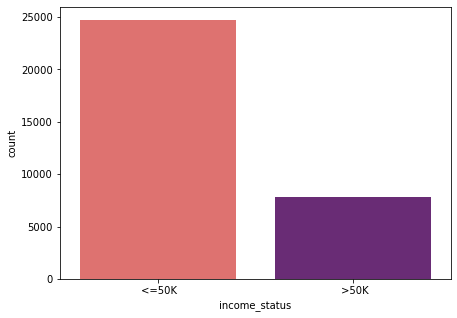

In [13]:
# Visualizing the counts of income status
plt.figure(figsize=(7, 5))
sns.countplot(data=income_df_copy, x='income_status', palette='magma_r');

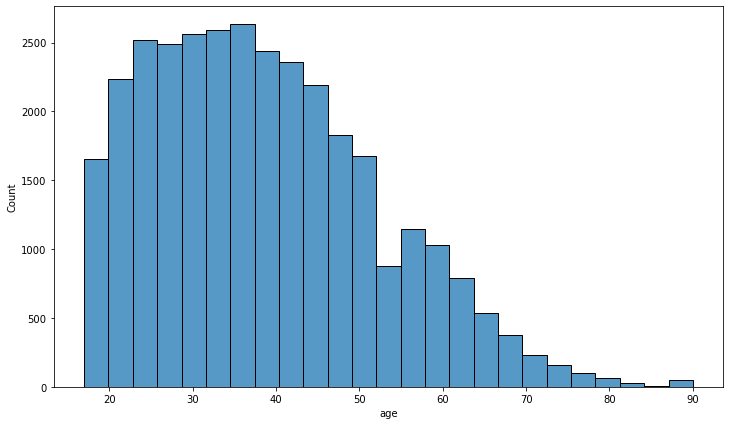

In [14]:
# Plotting the histogram of the "age" variable
plt.figure(figsize=(12, 7))
sns.histplot(data=income_df_copy, x='age', bins=25);

The **"age"** feature is **positively skewed or right skewed**.

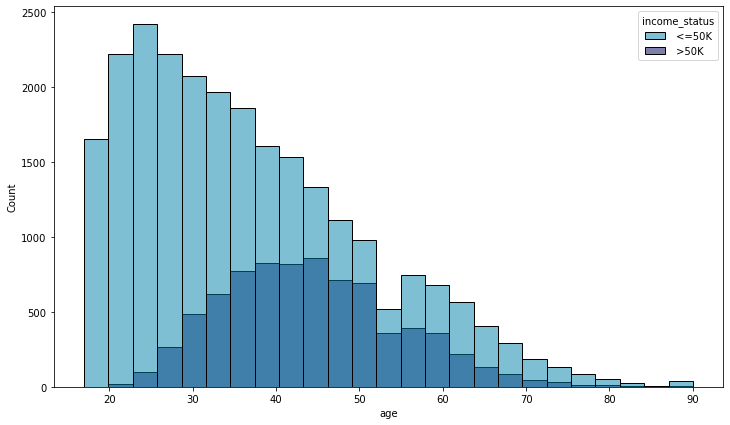

In [15]:
# Plotting the histogram of the "age" variable in relation to "income_status"
plt.figure(figsize=(12, 7))
sns.histplot(data=income_df_copy, x='age', hue='income_status', bins=25, palette='ocean_r');

From the above plot we can see that the distribution of age of the people having income less than or equal to $50,000 are more positively skewed than the people having income greater than $50,000. First of all, people on avg who are very young tend to have lesser income and as they grow old their income tend to rise. The $50,000+ earners are in lesser number and their age distribution is somewhat less skewed with most of the earners are within 35 to 45 years.

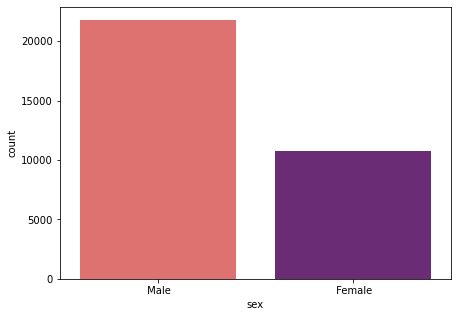

In [16]:
# Countplot of the sex feature
plt.figure(figsize=(7, 5))
sns.countplot(data=income_df_copy, x='sex', palette='magma_r');

In [17]:
# Sex Distribution
income_df_copy['sex'].value_counts()

 Male      21789
 Female    10771
Name: sex, dtype: int64

In [18]:
# Calculating the percentage distribution of sex
print("#total person = {}".format(len(income_df_copy)))
print("% of males = {}%".format(round(100*income_df_copy['sex'].value_counts()[0]/len(income_df_copy), 2)))
print("% of females = {}%".format(round(100*income_df_copy['sex'].value_counts()[1]/len(income_df_copy), 2)))

#total person = 32560
% of males = 66.92%
% of females = 33.08%


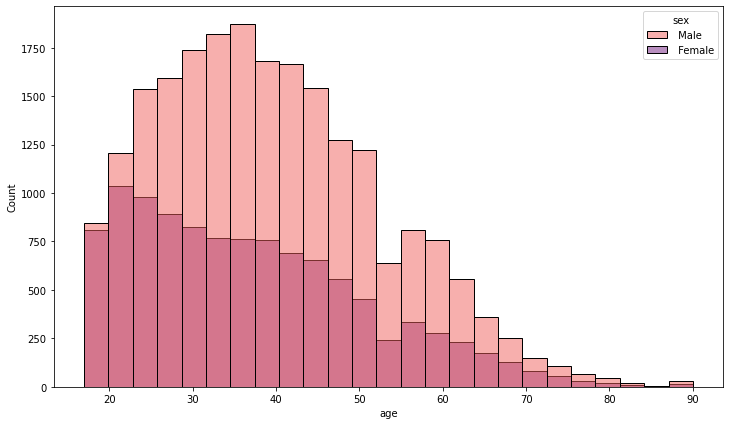

In [19]:
# Plotting the histogram of the "age" variable in relation to "sex".
plt.figure(figsize=(12, 7))
sns.histplot(data=income_df_copy, x='age', hue='sex', bins=25, palette='magma_r');

In the above histogram, we have the distribution in two categories of sex feature (shown in two colours) - i.e. for male and female.  For both female and male categories, the age distributions are right (positively) skewed. 

In [20]:
# Calculating the Sex distribution in relation to income status
gender_counts = income_df_copy.groupby(by=['income_status', 'sex']).count()['age'].reset_index().rename(columns={'age':'gender_counts'})
gender_counts

,income_status,sex,gender_counts
0,<=50K,Female,9592
1,<=50K,Male,15127
2,>50K,Female,1179
3,>50K,Male,6662


In [21]:
# Calculating the percentage distribution of sex based on income status
percentage_dis_gen_income = []
for i in gender_counts['gender_counts']:
    p = round(100*i/32560, 2)
    percentage_dis_gen_income.append(p)

# Storing the values of the 'percentage_dis_gen_income' list as gender_income_percentage
gender_counts['gender_income_percentage'] = percentage_dis_gen_income
gender_counts

,income_status,sex,gender_counts,gender_income_percentage
0,<=50K,Female,9592,29.46
1,<=50K,Male,15127,46.46
2,>50K,Female,1179,3.62
3,>50K,Male,6662,20.46


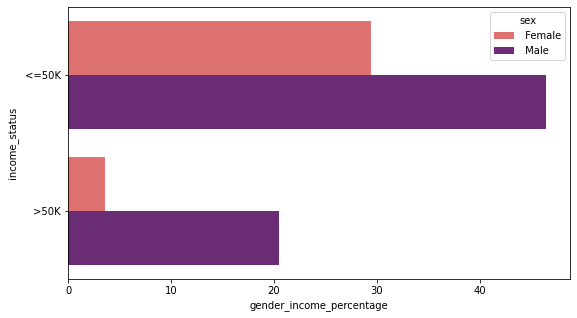

In [22]:
# Plotting the sex distribution based on income status
plt.figure(figsize=(9, 5))
sns.barplot(data=gender_counts, x='gender_income_percentage', y='income_status', hue='sex', palette='magma_r');

In [23]:
# Calculating a cross-tabulation between sex and income status of the people in frequency
sex_income_crosstab = pd.crosstab(index=income_df_copy['sex'], columns=income_df_copy['income_status'])
sex_income_crosstab

income_status,<=50K,>50K
sex,,
Female,9592,1179
Male,15127,6662


In [24]:
# Calculating a cross-tabulation between sex and income status of the people in proportions
sex_income_crosstab_prop = pd.crosstab(index=income_df_copy['sex'], columns=income_df_copy['income_status'], normalize='index')
sex_income_crosstab_prop

income_status,<=50K,>50K
sex,,
Female,0.890539,0.109461
Male,0.694249,0.305751


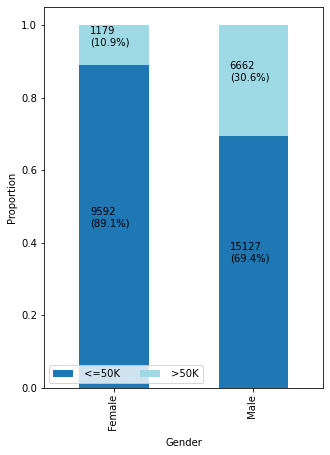

In [25]:
# Plotting a stacked barchart for the above cross tabulations
sex_income_crosstab_prop.plot(kind='bar', stacked=True,
                               colormap='tab20', figsize=(5, 7))

plt.legend(loc='lower left', ncol=2)
plt.xlabel('Gender')
plt.ylabel('Proportion')

for n, x in enumerate([*sex_income_crosstab.index.values]):
    for (proportion, count, y_loc) in zip(sex_income_crosstab_prop.loc[x],
                                          sex_income_crosstab.loc[x],
                                          sex_income_crosstab_prop.loc[x].cumsum()):
                
        plt.text(x=n - 0.17,
                 y=(y_loc - proportion) + (proportion / 2),
                 s=f'{count}\n({np.round(proportion * 100, 1)}%)', 
                 color="black",
                 fontsize=10);

So, out of the total female income earners, most of them are having less than or equal to $50,000. Similar result is for the male income earners.

In [26]:
# Checking the first few rows of the dataset
income_df_copy.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income_status
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


In [27]:
# First let us convert the values of the income_status to some numerical discrete categories
income_df_copy['income_status_target'] = income_df_copy['income_status'].replace({' <=50K':0, ' >50K':1})

So we have converted the categorical values of the income status to some numerical representaiton.

**0** means **<=50K** and **1** means **>50K**

In [28]:
# Checking both the target features
income_df_copy[['income_status', 'income_status_target']]

,income_status,income_status_target
0,<=50K,0
1,<=50K,0
2,<=50K,0
3,<=50K,0
4,<=50K,0
...,...,...
32555,<=50K,0
32556,>50K,1
32557,<=50K,0
32558,<=50K,0


In [29]:
# Checking the fnlwgt feature
income_df_copy['fnlwgt'].value_counts()

123011    13
203488    13
164190    13
121124    12
148995    12
          ..
68318      1
284211     1
312881     1
177711     1
229376     1
Name: fnlwgt, Length: 21647, dtype: int64

In [30]:
# The value counts of 'race' feature
income_df_copy['race'].value_counts()

 White                 27815
 Black                  3124
 Asian-Pac-Islander     1039
 Amer-Indian-Eskimo      311
 Other                   271
Name: race, dtype: int64

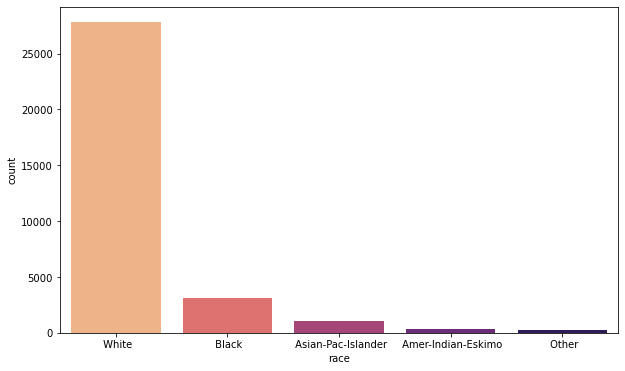

In [31]:
# Plotting the counts of the 'race' feature
plt.figure(figsize=(10, 6))
sns.countplot(data=income_df_copy, x='race', palette='magma_r');

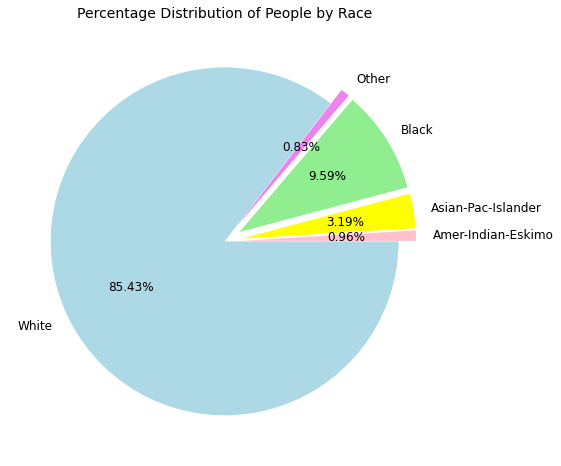

In [32]:
# Pie-chart of the distribution of 'race' feature
plt.figure(figsize=(10, 8))
data_pie_chart = income_df_copy['race'].value_counts().sort_index()
labels = ['Amer-Indian-Eskimo', 'Asian-Pac-Islander', 'Black', 'Other', 'White']
colors = ["pink","yellow", "lightgreen",'violet', "lightblue"]
plt.pie(x=data_pie_chart, labels=labels, autopct='%.2f%%', colors=colors, explode=(0.1, 0.1, 0.1, 0.1, 0), radius=1, textprops={'fontsize':12})
plt.title('Percentage Distribution of People by Race', fontsize=14)
plt.show()

Since, the dataset consists sample mostly taken from the US, so, we are getting a greater percentage of whites in the "race" distribution followed by the black people.

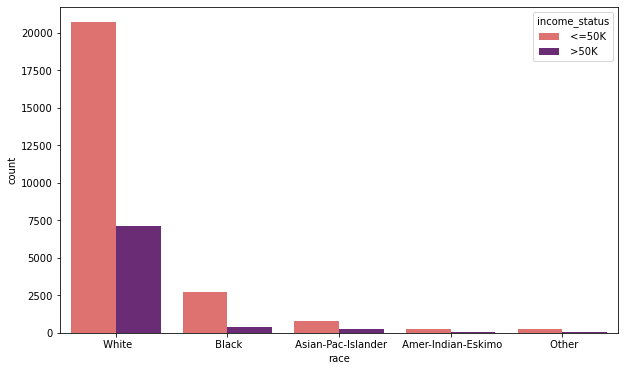

In [33]:
# Plotting the countplot of race by income status
plt.figure(figsize=(10, 6))
sns.countplot(data=income_df_copy, x='race', hue='income_status', palette='magma_r');

In [34]:
# Calculating a cross-tabulation between race and income status of the people in proportions
race_income_crosstab_prop = pd.crosstab(index=income_df_copy['race'], columns=income_df_copy['income_status'], normalize='index')
race_income_crosstab_prop

income_status,<=50K,>50K
race,,
Amer-Indian-Eskimo,0.884244,0.115756
Asian-Pac-Islander,0.734360,0.265640
Black,0.876120,0.123880
Other,0.907749,0.092251
White,0.744131,0.255869


In [35]:
# Calculating a cross-tabulation between race and income status of the people in frequency
race_income_crosstab = pd.crosstab(index=income_df_copy['race'], columns=income_df_copy['income_status'])
race_income_crosstab

income_status,<=50K,>50K
race,,
Amer-Indian-Eskimo,275,36
Asian-Pac-Islander,763,276
Black,2737,387
Other,246,25
White,20698,7117


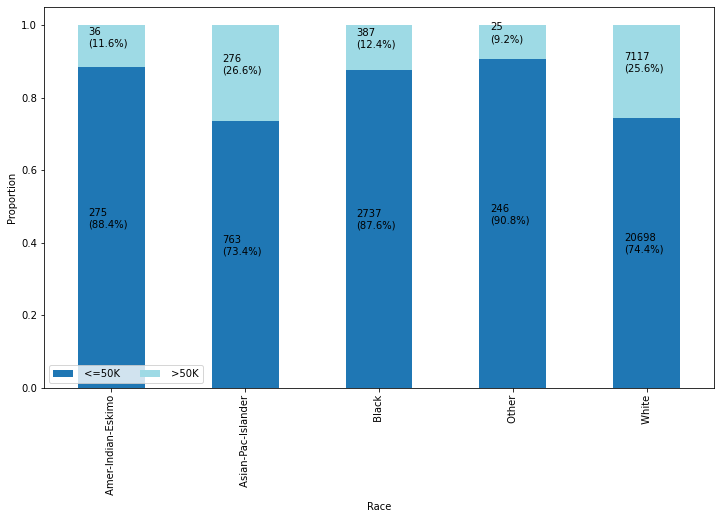

In [36]:
# Plotting a stacked barchart for the above cross tabulations
race_income_crosstab_prop.plot(kind='bar', stacked=True,
                               colormap='tab20', figsize=(12, 7))

plt.legend(loc='lower left', ncol=2)
plt.xlabel('Race')
plt.ylabel('Proportion')

for n, x in enumerate([*race_income_crosstab.index.values]):
    for (proportion, count, y_loc) in zip(race_income_crosstab_prop.loc[x],
                                          race_income_crosstab.loc[x],
                                          race_income_crosstab_prop.loc[x].cumsum()):
                
        plt.text(x=n - 0.17,
                 y=(y_loc - proportion) + (proportion / 2),
                 s=f'{count}\n({np.round(proportion * 100, 1)}%)', 
                 color="black",
                 fontsize=10);

From the above plot, we can see that only White and Asian-Pac-Islander races are having about 25%+ people belonging to the $50,000 income status.

In [37]:
# The value counts of 'relationship' feature
income_df_copy['relationship'].value_counts()

 Husband           13193
 Not-in-family      8304
 Own-child          5068
 Unmarried          3446
 Wife               1568
 Other-relative      981
Name: relationship, dtype: int64

The categories values of the categorical features have some leading whitespaces which we will try to remove them by creating a function.

We will also change the "?" value which are present in some of the features to "Unknown" or "Unknown/Other".

In [38]:
# Creating a function to remove leading whitespaces
def remove_lead_whitespaces(txt):
    split_text = txt.split(" ")
    return split_text[1]

In [39]:
# Applying the remove leading whitespace function to the features
income_df_copy['workclass'] = income_df_copy['workclass'].apply(remove_lead_whitespaces)
income_df_copy['education'] = income_df_copy['education'].apply(remove_lead_whitespaces)
income_df_copy['marital_status'] = income_df_copy['marital_status'].apply(remove_lead_whitespaces)
income_df_copy['occupation'] = income_df_copy['occupation'].apply(remove_lead_whitespaces)
income_df_copy['relationship'] = income_df_copy['relationship'].apply(remove_lead_whitespaces)
income_df_copy['race'] = income_df_copy['race'].apply(remove_lead_whitespaces)
income_df_copy['sex'] = income_df_copy['sex'].apply(remove_lead_whitespaces)
income_df_copy['native_country'] = income_df_copy['native_country'].apply(remove_lead_whitespaces)
income_df_copy['income_status'] = income_df_copy['income_status'].apply(remove_lead_whitespaces)

We will now try to group some of the categorical values of some of the features.

In [40]:
# Checking the value counts of the workclass feature
income_df_copy['workclass'].value_counts()

Private             22696
Self-emp-not-inc     2541
Local-gov            2093
?                    1836
State-gov            1297
Self-emp-inc         1116
Federal-gov           960
Without-pay            14
Never-worked            7
Name: workclass, dtype: int64

In [41]:
# Grouping some of the categories of the workclass feature
income_df_copy['work_class'] = income_df_copy['workclass'].replace({'Self-emp-not-inc':'Self_emp', 'Self-emp-inc':'Self_emp', 
                                                                    'Local-gov':'Govt', 'State-gov':'Govt', 'Federal-gov':'Govt',
                                                                    '?':'Unknown/Other', 'Without-pay':'Other', 'Never-worked':'Other'})

income_df_copy['work_class'].value_counts()                                                                    

Private          22696
Govt              4350
Self_emp          3657
Unknown/Other     1836
Other               21
Name: work_class, dtype: int64

In [42]:
# Checking the value counts of the marital_status feature
income_df_copy['marital_status'].value_counts()

Married-civ-spouse       14976
Never-married            10682
Divorced                  4443
Separated                 1025
Widowed                    993
Married-spouse-absent      418
Married-AF-spouse           23
Name: marital_status, dtype: int64

In [43]:
# Grouping some of the categories of the marital_status feature
income_df_copy['marital_status'] = income_df_copy['marital_status'].replace({'Married-civ-spouse':'Married', 'Married-spouse-absent':'Married', 'Married-AF-spouse':'Married',
                                                                             'Never-married':'Single'})

income_df_copy['marital_status'].value_counts()

Married      15417
Single       10682
Divorced      4443
Separated     1025
Widowed        993
Name: marital_status, dtype: int64

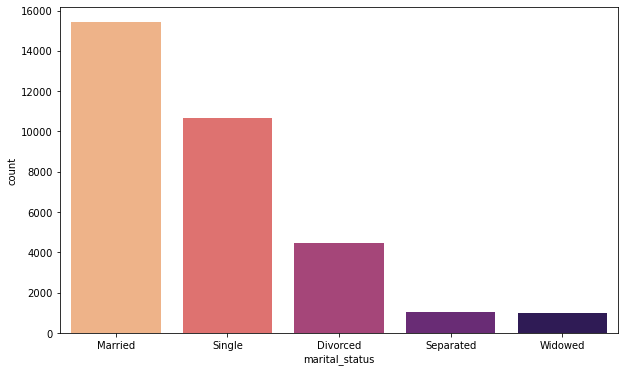

In [44]:
# Plotting the counts of the 'marital_status' feature
plt.figure(figsize=(10, 6))
sns.countplot(data=income_df_copy, x='marital_status', order=income_df_copy['marital_status'].value_counts().index, palette='magma_r');

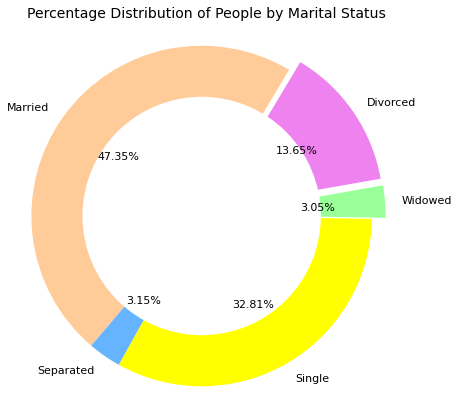

In [45]:
# Plotting donutplot for marital status by income status
labels = ['Divorced', 'Married', 'Separated', 'Single', 'Widowed']
sizes = [val for val in income_df_copy['marital_status'].value_counts().sort_index()]
#colors
colors = [ 'violet', '#ffcc99', '#66b3ff', "yellow",'#99ff99']


fig1, ax1 = plt.subplots(figsize=(7, 7))
ax1.pie(sizes, colors = colors, labels=labels, autopct='%.2f%%', startangle=10, explode=(0.08, 0, 0, 0, 0.08), textprops={'fontsize':11})
#draw circle
centre_circle = plt.Circle((0, 0),  0.7,  fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
# Equal aspect ratio ensures that pie is drawn as a circle
ax1.axis('equal')  
plt.title('Percentage Distribution of People by Marital Status', fontsize=14);

In [46]:
# Calculating a cross-tabulation between marital_status and income status of the people in proportions
marital_income_crosstab_prop = pd.crosstab(index=income_df_copy['marital_status'], columns=income_df_copy['income_status'], normalize='index')
marital_income_crosstab_prop

income_status,<=50K,>50K
marital_status,,
Divorced,0.895791,0.104209
Married,0.563080,0.436920
Separated,0.935610,0.064390
Single,0.954035,0.045965
Widowed,0.914401,0.085599


In [47]:
# Calculating a cross-tabulation between marital_status and income status of the people in proportions
marital_income_crosstab = pd.crosstab(index=income_df_copy['marital_status'], columns=income_df_copy['income_status'])
marital_income_crosstab

income_status,<=50K,>50K
marital_status,,
Divorced,3980,463
Married,8681,6736
Separated,959,66
Single,10191,491
Widowed,908,85


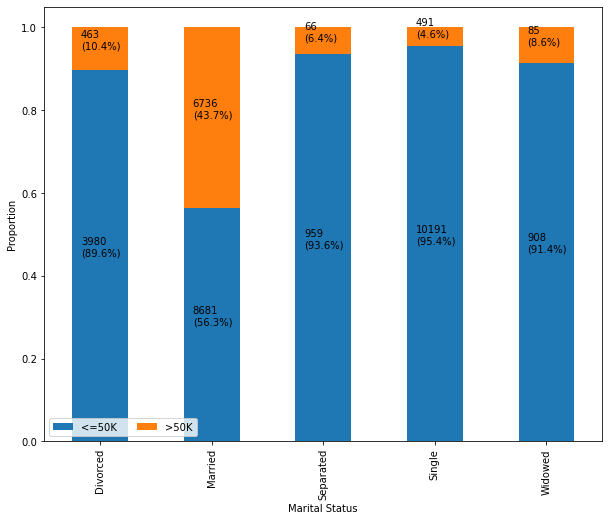

In [48]:
# Plotting a stacked barchart for the above cross tabulations
marital_income_crosstab_prop.plot(kind='bar', stacked=True,
                                figsize=(10, 8))

plt.legend(loc='lower left', ncol=2)
plt.xlabel('Marital Status')
plt.ylabel('Proportion')

for n, x in enumerate([*marital_income_crosstab.index.values]):
    for (proportion, count, y_loc) in zip(marital_income_crosstab_prop.loc[x],
                                          marital_income_crosstab.loc[x],
                                          marital_income_crosstab_prop.loc[x].cumsum()):
                
        plt.text(x=n - 0.17,
                 y=(y_loc - proportion) + (proportion / 2),
                 s=f'{count}\n({np.round(proportion * 100, 1)}%)', 
                 color="black",
                 fontsize=10);

From the above plot, we can observe that married couples are having a somewhat an even distribution of income status i.e. about 56% of them are having an income status of less than or equal to $50,000 and about 44% are having a greater income than $50,000. Other categories of the marital status are showing greater uneven distributions of income status as in almost every category other than the "married", about 90% to 90%+ of the people are having less than or equal to $50,000. 

In [49]:
# Checking the value counts of 'occupation' feature
income_df_copy['occupation'].value_counts()

Prof-specialty       4140
Craft-repair         4099
Exec-managerial      4066
Adm-clerical         3769
Sales                3650
Other-service        3295
Machine-op-inspct    2002
?                    1843
Transport-moving     1597
Handlers-cleaners    1370
Farming-fishing       994
Tech-support          928
Protective-serv       649
Priv-house-serv       149
Armed-Forces            9
Name: occupation, dtype: int64

In [50]:
# Grouping some of the categories of the occupation feature
income_df_copy['occupation'] = income_df_copy['occupation'].replace({'Prof-specialty':'Professional', 
                                                                     'Craft-repair':'Blue_collar', 
                                                                     'Exec-managerial':'White_collar', 
                                                                     'Adm-clerical':'White_collar',
                                                                     'Other-service':'Service', 
                                                                     'Machine-op-inspct':'Blue_collar', 
                                                                     '?':'Unknown/Other',
                                                                     'Armed-Forces':'Unknown/Other', 
                                                                     'Transport-moving':'Blue_collar',
                                                                     'Handlers-cleaners':'Blue_collar', 
                                                                     'Farming-fishing':'Blue_collar', 
                                                                     'Tech-support':'Service',
                                                                     'Protective-serv':'Service', 
                                                                     'Priv-house-serv':'Service'})

income_df_copy['occupation'].value_counts()                                                             

Blue_collar      10062
White_collar      7835
Service           5021
Professional      4140
Sales             3650
Unknown/Other     1852
Name: occupation, dtype: int64

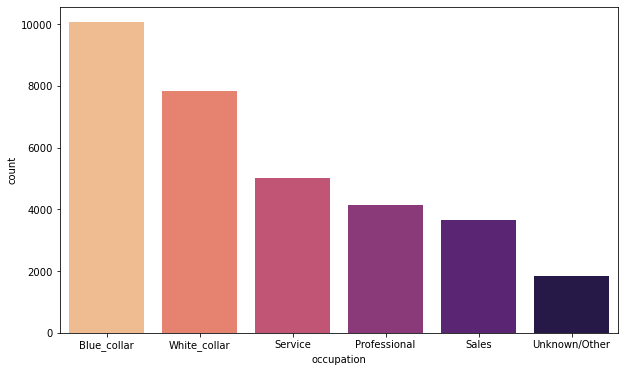

In [51]:
# Plotting the countplot of the 'occupation' feature
plt.figure(figsize=(10, 6))
sns.countplot(data=income_df_copy, x='occupation', order=income_df_copy['occupation'].value_counts().index, palette='magma_r');

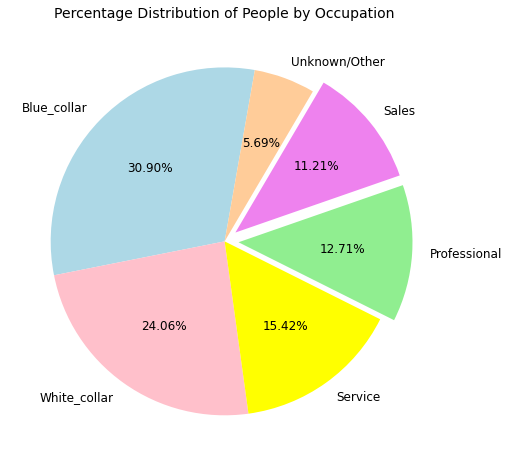

In [52]:
# Pie-chart of the distribution of 'occupation' feature
plt.figure(figsize=(10, 8))
data_pie_chart = income_df_copy['occupation'].value_counts()
labels = ['Blue_collar', 'White_collar', 'Service', 'Professional', 'Sales',
       'Unknown/Other']
colors = ["lightblue", "pink", "yellow", "lightgreen", 'violet', '#ffcc99']
plt.pie(x=data_pie_chart, labels=labels, startangle=80, autopct='%.2f%%', colors=colors, explode=(0, 0, 0, 0.08, 0.08, 0), radius=1, textprops={'fontsize':12})
plt.title('Percentage Distribution of People by Occupation', fontsize=14)
plt.show()

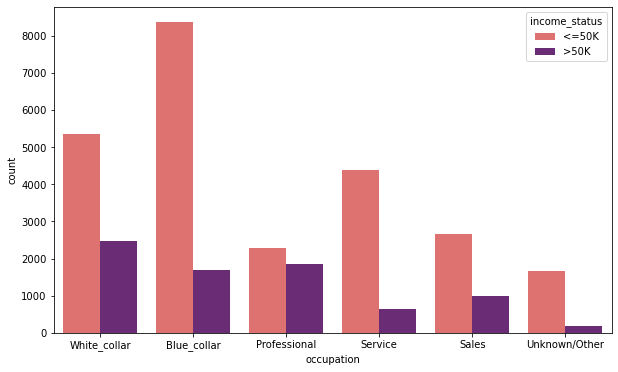

In [53]:
# Plotting the countplot of occupation by income status
plt.figure(figsize=(10, 6))
sns.countplot(data=income_df_copy, x='occupation', hue='income_status', palette='magma_r');

In [54]:
# Calculating a cross-tabulation between occupation and income status of the people in proportions
occ_income_crosstab_prop = pd.crosstab(index=income_df_copy['occupation'], columns=income_df_copy['income_status'], normalize='index')
occ_income_crosstab_prop

income_status,<=50K,>50K
occupation,,
Blue_collar,0.831048,0.168952
Professional,0.550966,0.449034
Sales,0.730685,0.269315
Service,0.874129,0.125871
Unknown/Other,0.896328,0.103672
White_collar,0.684110,0.315890


In [55]:
# Calculating a cross-tabulation between occupation and income status of the people in frequency
occ_income_crosstab = pd.crosstab(index=income_df_copy['occupation'], columns=income_df_copy['income_status'])
occ_income_crosstab

income_status,<=50K,>50K
occupation,,
Blue_collar,8362,1700
Professional,2281,1859
Sales,2667,983
Service,4389,632
Unknown/Other,1660,192
White_collar,5360,2475


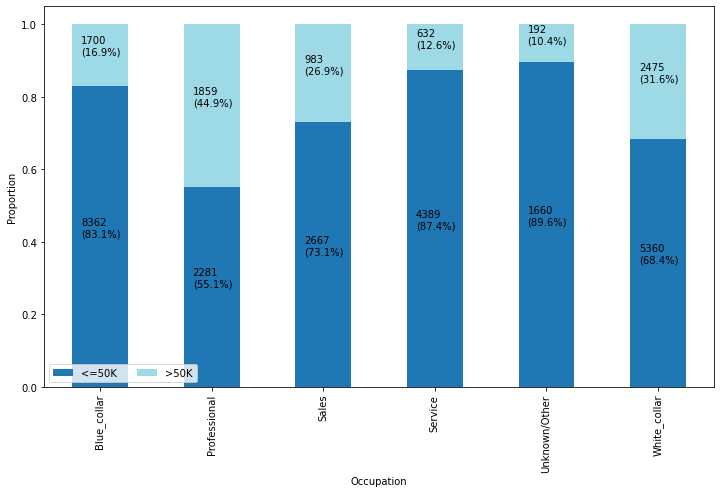

In [56]:
# Plotting a stacked barchart for the above cross tabulations
occ_income_crosstab_prop.plot(kind='bar', stacked=True,
                               colormap='tab20', figsize=(12, 7))

plt.legend(loc='lower left', ncol=2)
plt.xlabel('Occupation')
plt.ylabel('Proportion')

for n, x in enumerate([*occ_income_crosstab.index.values]):
    for (proportion, count, y_loc) in zip(occ_income_crosstab_prop.loc[x],
                                          occ_income_crosstab.loc[x],
                                          occ_income_crosstab_prop.loc[x].cumsum()):
                
        plt.text(x=n - 0.17,
                 y=(y_loc - proportion) + (proportion / 2),
                 s=f'{count}\n({np.round(proportion * 100, 1)}%)', 
                 color="black",
                 fontsize=10);

Income earners who are professional in their occupation are having a somewhat even distribution of income status whereas other categories of occuaption have greater uneven distribution of income status.

In [57]:
# The value counts of the 'education' feature
income_df_copy['education'].value_counts()

HS-grad         10501
Some-college     7291
Bachelors        5354
Masters          1723
Assoc-voc        1382
11th             1175
Assoc-acdm       1067
10th              933
7th-8th           646
Prof-school       576
9th               514
12th              433
Doctorate         413
5th-6th           333
1st-4th           168
Preschool          51
Name: education, dtype: int64

In [58]:
# Grouping some of the categories of the education feature
income_df_copy['education_level'] = income_df_copy['education'].replace({'1st-4th':'Under_matric',
                                                                         '5th-6th':'Under_matric',
                                                                         '7th-8th':'Under_matric',
                                                                         '9th':'Under_matric',
                                                                         '10th':'Matriculate',
                                                                         '11th':'Matriculate',
                                                                         '12th':'HS_graduate',
                                                                         'HS-grad':'HS_graduate',
                                                                         'Assoc-voc':'Associate_degree',
                                                                         'Assoc-acdm':'Associate_degree',
                                                                         'Some-college':'Graduate',
                                                                         'Bachelors':'Graduate',
                                                                         'Masters':'Postgraduate',
                                                                         'Prof-school':'Professional_school'})

income_df_copy['education_level'].value_counts()                                                                      

Graduate               12645
HS_graduate            10934
Associate_degree        2449
Matriculate             2108
Postgraduate            1723
Under_matric            1661
Professional_school      576
Doctorate                413
Preschool                 51
Name: education_level, dtype: int64

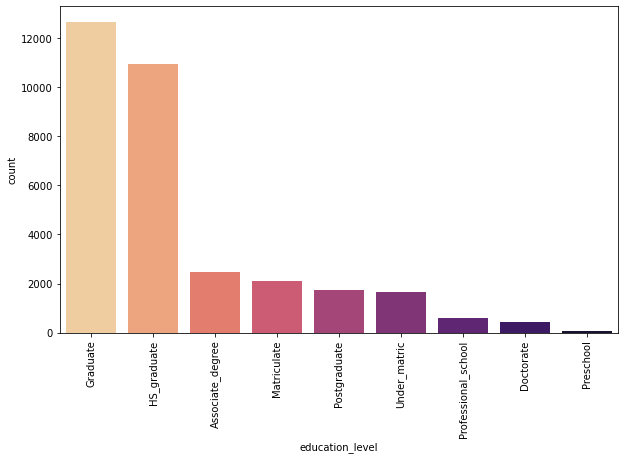

In [59]:
# Plotting the countplot of the 'education_level' feature
plt.figure(figsize=(10, 6))
sns.countplot(data=income_df_copy, x='education_level', order=income_df_copy['education_level'].value_counts().index, palette='magma_r')
plt.xticks(rotation=90);

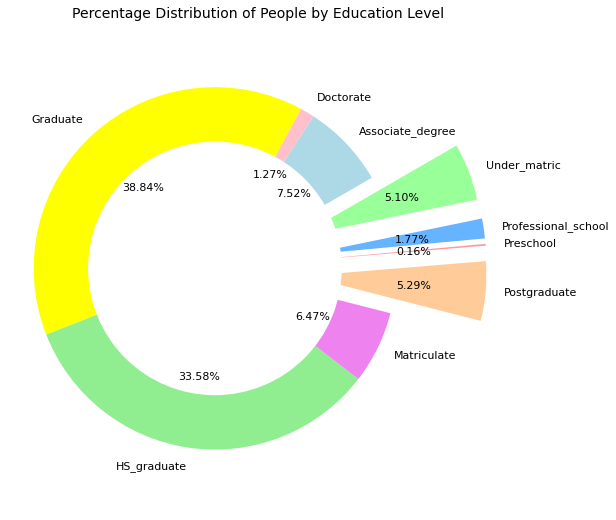

In [60]:
# Plotting donutplot for education level by income status
labels = ['Associate_degree', 'Doctorate', 'Graduate', 'HS_graduate',
       'Matriculate', 'Postgraduate', 'Preschool', 'Professional_school',
       'Under_matric']
sizes = [val for val in income_df_copy['education_level'].value_counts().sort_index()]
#colors
colors = ["lightblue", "pink", "yellow", "lightgreen", 'violet', '#ffcc99', '#ff9999','#66b3ff','#99ff99']


fig1, ax1 = plt.subplots(figsize=(9, 9))
ax1.pie(sizes, colors = colors, labels=labels, autopct='%.2f%%', startangle=30, explode=(0, 0, 0, 0, 0, 0.5, 0.5, 0.5, 0.5), textprops={'fontsize':11})
#draw circle
centre_circle = plt.Circle((0, 0),  0.7,  fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
# Equal aspect ratio ensures that pie is drawn as a circle
ax1.axis('equal')  
plt.title('Percentage Distribution of People by Education Level', fontsize=14);

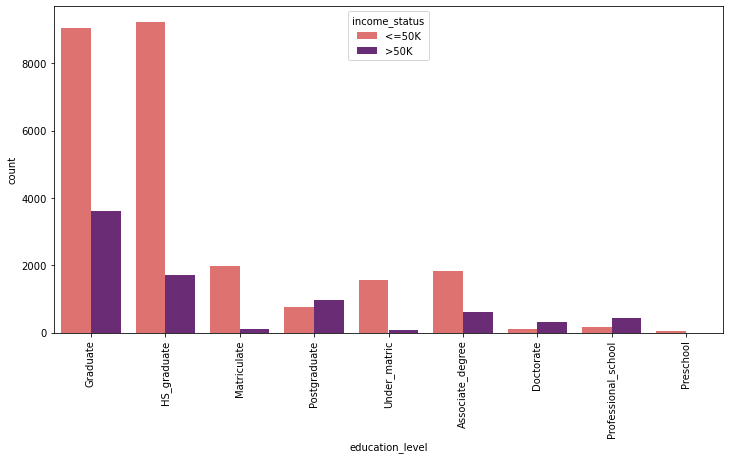

In [61]:
# Plotting the countplot of education_level by income status
plt.figure(figsize=(12, 6))
sns.countplot(data=income_df_copy, x='education_level', hue='income_status', palette='magma_r')
plt.xticks(rotation=90);

In [62]:
# Calculating a cross-tabulation between education_level and income status of the people in proportions
edu_income_crosstab_prop = pd.crosstab(index=income_df_copy['education_level'], columns=income_df_copy['income_status'], normalize='index')
edu_income_crosstab_prop

income_status,<=50K,>50K
education_level,,
Associate_degree,0.744385,0.255615
Doctorate,0.259080,0.740920
Graduate,0.714670,0.285330
HS_graduate,0.843790,0.156210
Matriculate,0.942125,0.057875
Postgraduate,0.443413,0.556587
Preschool,1.000000,0.000000
Professional_school,0.265625,0.734375
Under_matric,0.946418,0.053582


In [63]:
# Calculating a cross-tabulation between education_level and income status of the people in frequency
edu_income_crosstab = pd.crosstab(index=income_df_copy['education_level'], columns=income_df_copy['income_status'])
edu_income_crosstab

income_status,<=50K,>50K
education_level,,
Associate_degree,1823,626
Doctorate,107,306
Graduate,9037,3608
HS_graduate,9226,1708
Matriculate,1986,122
Postgraduate,764,959
Preschool,51,0
Professional_school,153,423
Under_matric,1572,89


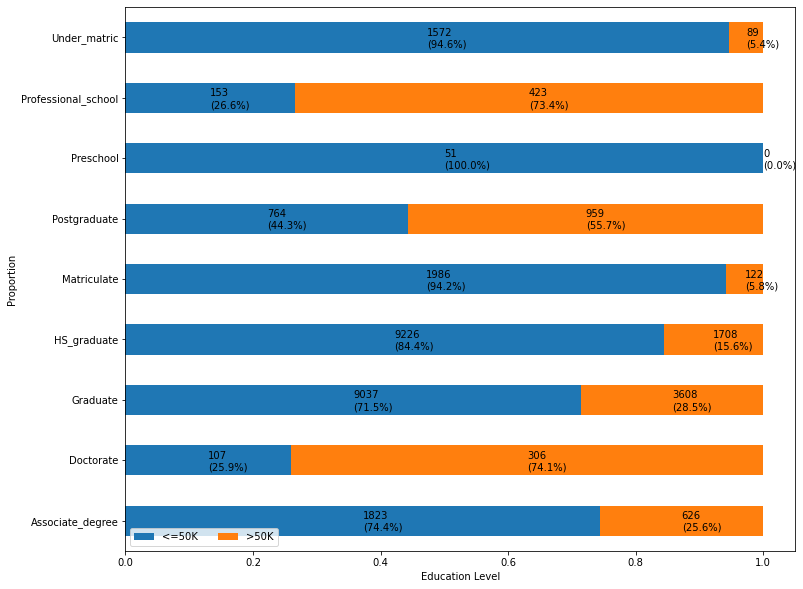

In [64]:
# Plotting a stacked barchart for the above cross tabulations
edu_income_crosstab_prop.plot(kind='barh', stacked=True,
                                figsize=(12, 10))

plt.legend(loc='lower left', ncol=2)
plt.xlabel('Education Level')
plt.ylabel('Proportion')

for n, x in enumerate([*edu_income_crosstab.index.values]):
    for (proportion, count, y_loc) in zip(edu_income_crosstab_prop.loc[x],
                                          edu_income_crosstab.loc[x],
                                          edu_income_crosstab_prop.loc[x].cumsum()):
                
        plt.text(y=n - 0.17,
                 x=(y_loc - proportion) + (proportion / 2),
                 s=f'{count}\n({np.round(proportion * 100, 1)}%)', 
                 color="black",
                 fontsize=10);

From the above plot we can clearly observe that people having a degree from a Professional school or a doctorate degree or a postgraduate degree as their educational qualification are having income more than $50,000.

In [65]:
# Changing the '?' to 'unknown' for the native
income_df_copy['native_country'] = income_df_copy['native_country'].replace({'?':'Unknown/Other'})
income_df_copy['native_country'].value_counts()

United-States                 29169
Mexico                          643
Unknown/Other                   583
Philippines                     198
Germany                         137
Canada                          121
Puerto-Rico                     114
El-Salvador                     106
India                           100
Cuba                             95
England                          90
Jamaica                          81
South                            80
China                            75
Italy                            73
Dominican-Republic               70
Vietnam                          67
Guatemala                        64
Japan                            62
Poland                           60
Columbia                         59
Taiwan                           51
Haiti                            44
Iran                             43
Portugal                         37
Nicaragua                        34
Peru                             31
France                      

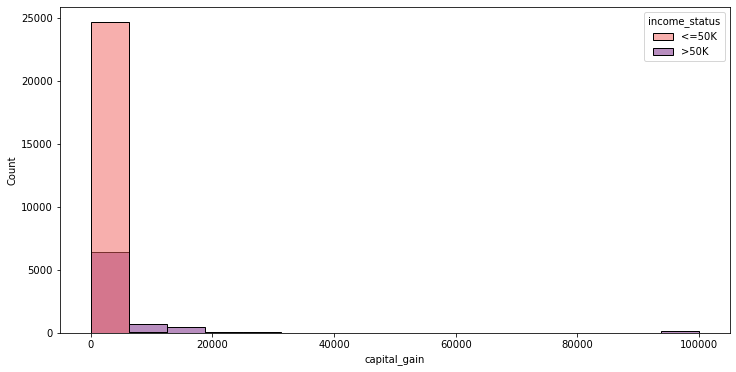

In [66]:
# Histogram of the "captial_gain" by 'income_status'
plt.figure(figsize=(12, 6))
sns.histplot(data=income_df_copy, x='capital_gain', hue='income_status', palette='magma_r');

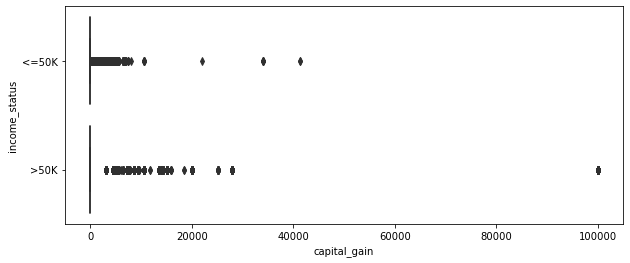

In [67]:
# Boxplot of the "capital_gain" by 'income_status
plt.figure(figsize=(10, 4))
sns.boxplot(data=income_df_copy, x='capital_gain', y='income_status', palette='magma_r');

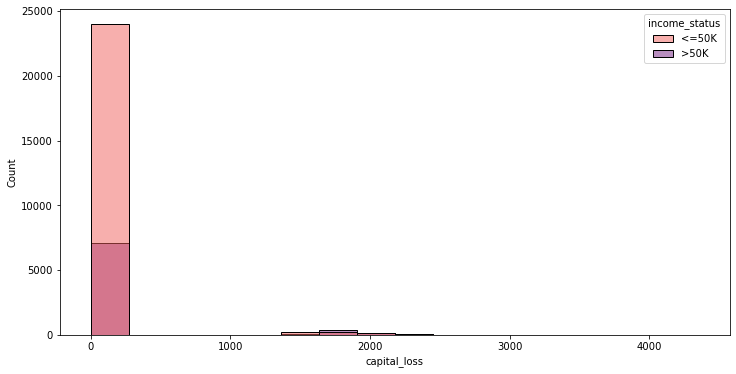

In [68]:
# Histogram of the "captial_loss" by 'income_status'
plt.figure(figsize=(12, 6))
sns.histplot(data=income_df_copy, x='capital_loss', hue='income_status', palette='magma_r');

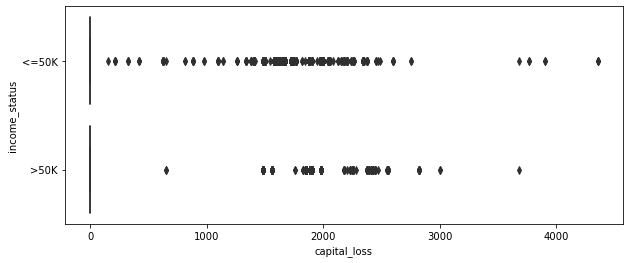

In [69]:
# Boxplot of the "capital_loss" by 'income_status
plt.figure(figsize=(10, 4))
sns.boxplot(data=income_df_copy, x='capital_loss', y='income_status', palette='magma_r');

In [70]:
# First few rows of the dataset
income_df_copy.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income_status,income_status_target,work_class,education_level
0,50,Self-emp-not-inc,83311,Bachelors,13,Married,White_collar,Husband,White,Male,0,0,13,United-States,<=50K,0,Self_emp,Graduate
1,38,Private,215646,HS-grad,9,Divorced,Blue_collar,Not-in-family,White,Male,0,0,40,United-States,<=50K,0,Private,HS_graduate
2,53,Private,234721,11th,7,Married,Blue_collar,Husband,Black,Male,0,0,40,United-States,<=50K,0,Private,Matriculate
3,28,Private,338409,Bachelors,13,Married,Professional,Wife,Black,Female,0,0,40,Cuba,<=50K,0,Private,Graduate
4,37,Private,284582,Masters,14,Married,White_collar,Wife,White,Female,0,0,40,United-States,<=50K,0,Private,Postgraduate


Now for our analysis in modelling phase, we are going to drop some highly skewed features such as **"native_country"** since most of the observations are of United States and **"capital_gain"** and **"capital_loss"** features where most of the data points are 0. We are also going to drop some redundant features such as **"workclass"**, **"education"**, **"educational_num"**, **"relatipnship"** and **"income_status"**. 

In [71]:
# Now we are going to drop some features (irrelevant features) for our model
income_df_copy_dropped = income_df_copy.drop(labels=['workclass', 'fnlwgt', 'education', 'education_num', 'relationship', 'income_status',
                                                     'capital_gain', 'capital_loss', 'native_country'], axis=1)

In [72]:
# Check the first few rows of the dropped dataset
income_df_copy_dropped.head()

,age,marital_status,occupation,race,sex,hours_per_week,income_status_target,work_class,education_level
0,50,Married,White_collar,White,Male,13,0,Self_emp,Graduate
1,38,Divorced,Blue_collar,White,Male,40,0,Private,HS_graduate
2,53,Married,Blue_collar,Black,Male,40,0,Private,Matriculate
3,28,Married,Professional,Black,Female,40,0,Private,Graduate
4,37,Married,White_collar,White,Female,40,0,Private,Postgraduate


#### **Preprocessing Steps**

First let us convert the **education_level** feature to a discrete ordinal feature.

In [73]:
income_df_copy_dropped['education_level'].value_counts()

Graduate               12645
HS_graduate            10934
Associate_degree        2449
Matriculate             2108
Postgraduate            1723
Under_matric            1661
Professional_school      576
Doctorate                413
Preschool                 51
Name: education_level, dtype: int64

In [74]:
# Let us perform ordinal encoding to the "education_level" feature
income_df_copy_dropped['education_level_enc'] = income_df_copy_dropped['education_level'].replace({'Preschool':1,
                                                                                                   'Under_matric':2,
                                                                                                   'Matriculate':3,
                                                                                                   'HS_graduate':4,
                                                                                                   'Associate_degree':5,
                                                                                                   'Graduate':6,
                                                                                                   'Postgraduate':7,
                                                                                                   'Professional_school':8,
                                                                                                   'Doctorate':9})
income_df_copy_dropped['education_level_enc'].value_counts()                                                                                                  

6    12645
4    10934
5     2449
3     2108
7     1723
2     1661
8      576
9      413
1       51
Name: education_level_enc, dtype: int64

In [75]:
# Dropping the categorical education_level feature
income_df_copy_dropped = income_df_copy_dropped.drop(labels=['education_level'], axis=1)
income_df_copy_dropped.head()

,age,marital_status,occupation,race,sex,hours_per_week,income_status_target,work_class,education_level_enc
0,50,Married,White_collar,White,Male,13,0,Self_emp,6
1,38,Divorced,Blue_collar,White,Male,40,0,Private,4
2,53,Married,Blue_collar,Black,Male,40,0,Private,3
3,28,Married,Professional,Black,Female,40,0,Private,6
4,37,Married,White_collar,White,Female,40,0,Private,7


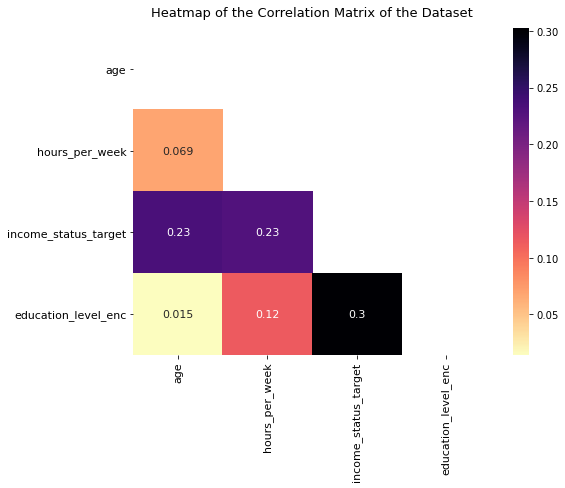

In [76]:
# Let's quickly visualize a heatmap of the correlation between the numnerical features
mask = np.triu(np.ones_like(income_df_copy_dropped.corr()))
plt.figure(figsize=(8, 6))
sns.heatmap(data=income_df_copy_dropped.corr(), cmap='magma_r', annot=True, fmt='.2g', mask=mask, annot_kws={"size": 11})
plt.title('Heatmap of the Correlation Matrix of the Dataset', fontsize=13, pad=12)
plt.yticks(fontsize=11)
plt.xticks(fontsize=11);

From the above heatmap of the correlation matrix of the dataset, we can se very less correlation between the features - age, hours_per_week, income_status_target and education_level_enc

Now, it's time for **"one-hot-encoding"**. We will perform one-hot-encoding to the other categorical features because they do not posses the ordinal values.

In [77]:
# Let us perform one-hot-encoding
income_df_copy_dropped_1 = pd.get_dummies(data=income_df_copy_dropped, columns=['marital_status', 'occupation', 'race', 'sex', 'work_class'], drop_first=True)
income_df_copy_dropped_1.head()

,age,hours_per_week,income_status_target,education_level_enc,marital_status_Married,marital_status_Separated,marital_status_Single,marital_status_Widowed,occupation_Professional,occupation_Sales,...,occupation_White_collar,race_Asian-Pac-Islander,race_Black,race_Other,race_White,sex_Male,work_class_Other,work_class_Private,work_class_Self_emp,work_class_Unknown/Other
0,50,13,0,6,1,0,0,0,0,0,...,1,0,0,0,1,1,0,0,1,0
1,38,40,0,4,0,0,0,0,0,0,...,0,0,0,0,1,1,0,1,0,0
2,53,40,0,3,1,0,0,0,0,0,...,0,0,1,0,0,1,0,1,0,0
3,28,40,0,6,1,0,0,0,1,0,...,0,0,1,0,0,0,0,1,0,0
4,37,40,0,7,1,0,0,0,0,0,...,1,0,0,0,1,0,0,1,0,0


In [78]:
# Checking the columns of the dataset after one-hot-encoding
income_df_copy_dropped_1.columns

Index(['age', 'hours_per_week', 'income_status_target', 'education_level_enc',
       'marital_status_Married', 'marital_status_Separated',
       'marital_status_Single', 'marital_status_Widowed',
       'occupation_Professional', 'occupation_Sales', 'occupation_Service',
       'occupation_Unknown/Other', 'occupation_White_collar',
       'race_Asian-Pac-Islander', 'race_Black', 'race_Other', 'race_White',
       'sex_Male', 'work_class_Other', 'work_class_Private',
       'work_class_Self_emp', 'work_class_Unknown/Other'],
      dtype='object')

Segregating the dataset into **features** (X) and **target** (y) variables

In [79]:
# Creating feature matrix (X) and output vector (y)
X = income_df_copy_dropped_1.drop(labels=['income_status_target'], axis=1)
y = income_df_copy_dropped_1['income_status_target']

In [80]:
# X matrix
X.head()

,age,hours_per_week,education_level_enc,marital_status_Married,marital_status_Separated,marital_status_Single,marital_status_Widowed,occupation_Professional,occupation_Sales,occupation_Service,...,occupation_White_collar,race_Asian-Pac-Islander,race_Black,race_Other,race_White,sex_Male,work_class_Other,work_class_Private,work_class_Self_emp,work_class_Unknown/Other
0,50,13,6,1,0,0,0,0,0,0,...,1,0,0,0,1,1,0,0,1,0
1,38,40,4,0,0,0,0,0,0,0,...,0,0,0,0,1,1,0,1,0,0
2,53,40,3,1,0,0,0,0,0,0,...,0,0,1,0,0,1,0,1,0,0
3,28,40,6,1,0,0,0,1,0,0,...,0,0,1,0,0,0,0,1,0,0
4,37,40,7,1,0,0,0,0,0,0,...,1,0,0,0,1,0,0,1,0,0


In [81]:
# y matrix
y

0        0
1        0
2        0
3        0
4        0
        ..
32555    0
32556    1
32557    0
32558    0
32559    1
Name: income_status_target, Length: 32560, dtype: int64

In [82]:
# Checking sizes of the X and y matrices
X.shape, y.shape

((32560, 21), (32560,))

**Normalizing the data**

In [83]:
# Normalizing some of the feature by using the MinMaxScaler (scaling between 0 and 1)
# Creating an instance of MinMaxScaler()
m_scaler = MinMaxScaler()

# Taking the columns of the X matrix
cols = X.columns

# Fitting and transforming X matrix
X_scaled = m_scaler.fit_transform(X)
X_scaled = pd.DataFrame(X_scaled, columns=cols)

In [84]:
# Checking the normalized data
X_scaled.head()

,age,hours_per_week,education_level_enc,marital_status_Married,marital_status_Separated,marital_status_Single,marital_status_Widowed,occupation_Professional,occupation_Sales,occupation_Service,...,occupation_White_collar,race_Asian-Pac-Islander,race_Black,race_Other,race_White,sex_Male,work_class_Other,work_class_Private,work_class_Self_emp,work_class_Unknown/Other
0,0.452055,0.122449,0.625,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0
1,0.287671,0.397959,0.375,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0
2,0.493151,0.397959,0.250,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
3,0.150685,0.397959,0.625,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0.273973,0.397959,0.750,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0


#### **Model Training**

**Splitting the feature matrix into training and testing sets**

In [85]:
# Splitting the feature matrix
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101, stratify=y)

In [86]:
# Shape of the training and testing sets
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((22792, 21), (9768, 21), (22792,), (9768,))

**Base Models**

In [87]:
# Evaluating models in terms of performance metrics and roc_auc
models = [LogisticRegression(random_state=101, solver='liblinear'),
          DecisionTreeClassifier(random_state=101), 
          RandomForestClassifier(random_state=101),
          AdaBoostClassifier(random_state=101),
          GradientBoostingClassifier(random_state=101),
          XGBClassifier(random_state=101, use_label_encoder=False),
          SVC(random_state=101, probability=True),
          SGDClassifier(random_state=101, loss='log')]

# Define a result table as a DataFrame for roc_curves
roc_auc_df = pd.DataFrame(columns=['classifiers', 'fpr','tpr','auc'])

# looping through different classifiers
for model in models:

    # For XGBClassifier 
    if model.__class__.__name__ == "XGBClassifier":
        # Fit the XGBoost Classifier
        model.fit(X_train, y_train,
            verbose=False,
            early_stopping_rounds=10,
            eval_metric='auc',
            eval_set=[(X_test, y_test)])
    
    # Fort other classifiers
    else:
        # fitting the model
        model.fit(X_train, y_train)
        # getting predictions
        y_preds = model.predict(X_test)

    cm = confusion_matrix(y_test, y_preds)
    TN, FP, TP, FN = cm[0][0], cm[0][1], cm[1][1], cm[1][0]

    # Computing different metrics
    accuracy = (TP + TN)/(TP + TN + FN + FP)
    precision = TP/(TP + FP)
    recall = TP/(TP + FN)
    specificity = TN/(TN + FP)
    f1_score = 2*(recall * precision)/(recall + precision)
    balanced_accuracy_score = (recall + specificity)/2

    print("{}".format(model.__class__.__name__), '\n')
    print("Training Accuracy = {:.3f}%".format(model.score(X_train, y_train)*100))
    print("Accuracy (Ratio of Correct Predictions to Total Predictions) = {:.3f}%".format(accuracy*100))
    print('Missclassification (1 - Accuracy) = {:.3f}%'.format((1 - accuracy)*100))
    print("Precision (Ratio of True Positives to Total Predicted Positives) = {:.3f}%".format(precision*100)) 
    print("Sensitivity/Recall (Ratio of True Positives to Total Actual Positives) = {:.3f}%".format(recall*100)) 
    print("Specificity (Ratio of True Negatives to Total Actual Negatives) = {:.3f}%".format(specificity*100))
    print('Balanced Accuracy Score (Arithmetic Mean of Recall and Specificity) = {:.3f}%'.format(balanced_accuracy_score*100))
    print("F1_score (Harmonic mean of Sensitivity and Precision) = {:.3f}%".format(f1_score*100))
    print("=========================================================================", '\n')

    # Computing required components for ROC curves
    y_pred_proba = model.predict_proba(X_test)
    fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba[:, 1])
    roc_auc = roc_auc_score(y_test, y_pred_proba[:, 1])*100
    roc_auc_df = roc_auc_df.append({'classifiers':model.__class__.__name__,
                                    'fpr':fpr, 
                                    'tpr':tpr, 
                                    'auc':roc_auc}, ignore_index=True)

# Set name of the classifiers as index labels
roc_auc_df.set_index('classifiers', inplace=True)                             

LogisticRegression 

Training Accuracy = 82.270%
Accuracy (Ratio of Correct Predictions to Total Predictions) = 82.228%
Missclassification (1 - Accuracy) = 17.772%
Precision (Ratio of True Positives to Total Predicted Positives) = 67.073%
Sensitivity/Recall (Ratio of True Positives to Total Actual Positives) = 51.446%
Specificity (Ratio of True Negatives to Total Actual Negatives) = 91.990%
Balanced Accuracy Score (Arithmetic Mean of Recall and Specificity) = 71.718%
F1_score (Harmonic mean of Sensitivity and Precision) = 58.229%

DecisionTreeClassifier 

Training Accuracy = 94.779%
Accuracy (Ratio of Correct Predictions to Total Predictions) = 77.611%
Missclassification (1 - Accuracy) = 22.389%
Precision (Ratio of True Positives to Total Predicted Positives) = 53.843%
Sensitivity/Recall (Ratio of True Positives to Total Actual Positives) = 49.150%
Specificity (Ratio of True Negatives to Total Actual Negatives) = 86.637%
Balanced Accuracy Score (Arithmetic Mean of Recall and Specificit

In [88]:
# Check the roc_auc_df 
roc_auc_df

,fpr,tpr,auc
classifiers,,,
LogisticRegression,"[0.0, 0.0, 0.0, 0.00013484358144552318, 0.0001...","[0.0, 0.00042517006802721087, 0.00255102040816...",86.790583
DecisionTreeClassifier,"[0.0, 0.11637001078748652, 0.11637001078748652...","[0.0, 0.41836734693877553, 0.4187925170068027,...",72.645839
RandomForestClassifier,"[0.0, 0.001348435814455232, 0.0014832793959007...","[0.0, 0.027636054421768707, 0.0276360544217687...",84.358385
AdaBoostClassifier,"[0.0, 0.00013484358144552318, 0.00026968716289...","[0.0, 0.011904761904761904, 0.0140306122448979...",87.754082
GradientBoostingClassifier,"[0.0, 0.0, 0.0, 0.00013484358144552318, 0.0001...","[0.0, 0.00042517006802721087, 0.00085034013605...",88.248061
XGBClassifier,"[0.0, 0.0, 0.0, 0.00013484358144552318, 0.0001...","[0.0, 0.00042517006802721087, 0.00170068027210...",88.156236
SVC,"[0.0, 0.0, 0.0, 0.00013484358144552318, 0.0001...","[0.0, 0.00042517006802721087, 0.00127551020408...",86.426684
SGDClassifier,"[0.0, 0.045981661272923406, 0.0470604099244875...","[0.0, 0.304421768707483, 0.31462585034013607, ...",84.693052


In [89]:
# Creating a function to train and fit different models and return their performance results.
def evaluate_model_df(models):

    # Lists for storing perfomance metrics
    model_name_list = []
    train_acc_list = []
    test_acc_list = []
    preci_list = []
    sensi_list = []
    speci_list = []
    balanced_acc_list = []
    f1_list = []
    roc_auc_list = []
    gini_list = []
    

    # looping through different classifiers
    for model in models:
        # Taking the name of the classifier
        model_name_list.append(model.__class__.__name__)


        # For XGBClassifier 
        if model.__class__.__name__ == "XGBClassifier":
            # Fit the XGBoost Classifier
            model.fit(X_train, y_train,
                verbose=False,
                early_stopping_rounds=10,
                eval_metric='auc',
                eval_set=[(X_test, y_test)])
        
        # Fort other classifiers
        else:
            # fitting the model
            model.fit(X_train, y_train)
            # getting predictions
            y_preds = model.predict(X_test)
    
        # computing the confusion matrix
        cm = confusion_matrix(y_test, y_preds)
        TN, FP, TP, FN = cm[0][0], cm[0][1], cm[1][1], cm[1][0]

        # Computing different metrics
        accuracy = (TP + TN)/(TP + TN + FN + FP)
        precision = TP/(TP + FP)
        sensitivity = TP/(TP + FN)
        specificity = TN/(TN + FP)
        f1_score = 2*(sensitivity * precision)/(sensitivity + precision)
        balanced_accuracy_score = (sensitivity + specificity)/2

        # Calculating the probabilities of predictions
        y_pred_proba = model.predict_proba(X_test)
        fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba[:, 1])

        # Calculating the ROC-AUC score and Gini
        roc_auc = roc_auc_score(y_test, y_pred_proba[:, 1])*100
        gini = (2/100) * roc_auc - 1

        # Appending the scores in the above performance metric lists
        train_acc_list.append(round(model.score(X_train, y_train)*100, 2))
        test_acc_list.append(round(accuracy*100, 2))
        preci_list.append(round(precision*100, 2))
        sensi_list.append(round(sensitivity*100, 2))
        speci_list.append(round(specificity*100, 2))
        balanced_acc_list.append(round(balanced_accuracy_score*100, 2))
        f1_list.append(round(f1_score*100, 2))
        roc_auc_list.append(round(roc_auc, 2))
        gini_list.append(round(gini, 3))

    
    # Creating a DataFrame for storing the above score lists of all the classifiers
    df = pd.DataFrame()
    df['classifiers'] = model_name_list
    df['training_accuracy'] = train_acc_list
    df['testing_accuracy'] = test_acc_list
    df['precision'] = preci_list
    df['sensitivity'] = sensi_list
    df['specificity'] = speci_list
    df['f1_score'] = f1_list
    df['balanced_accuracy'] = balanced_acc_list
    df['roc_auc'] = roc_auc_list
    df['gini'] = gini_list

    return df

In [90]:
# Using the evaluate_model_df function to different classifiers to create the performace score dataframe
base_model_df = evaluate_model_df([LogisticRegression(random_state=101, solver='liblinear'),
                                DecisionTreeClassifier(random_state=101), 
                                RandomForestClassifier(random_state=101),
                                AdaBoostClassifier(random_state=101),
                                GradientBoostingClassifier(random_state=101),
                                XGBClassifier(random_state=101, use_label_encoder=False),
                                SVC(random_state=101, probability=True),
                                SGDClassifier(random_state=101, loss='log')])

In [91]:
# The base_model_df 
base_model_df

,classifiers,training_accuracy,testing_accuracy,precision,sensitivity,specificity,f1_score,balanced_accuracy,roc_auc,gini
0,LogisticRegression,82.27,82.23,67.07,51.45,91.99,58.23,71.72,86.79,0.736
1,DecisionTreeClassifier,94.78,77.61,53.84,49.15,86.64,51.39,67.89,72.65,0.453
2,RandomForestClassifier,94.77,80.68,61.32,53.53,89.29,57.16,71.41,84.36,0.687
3,AdaBoostClassifier,82.89,82.77,68.61,52.42,92.39,59.44,72.41,87.75,0.755
4,GradientBoostingClassifier,83.44,82.90,67.27,56.46,91.29,61.40,73.88,88.25,0.765
5,XGBClassifier,83.99,82.90,67.27,56.46,91.29,61.40,73.88,88.16,0.763
6,SVC,81.17,80.92,72.93,32.99,96.12,45.43,64.55,86.43,0.729
7,SGDClassifier,80.27,80.17,57.87,64.88,85.02,61.17,74.95,84.69,0.694


So, we have made a dataframe of all the classifiers performance metrics with default hyperparameters and we will consider these models as the base models. This dataframe gives us a comparison to the different classifiers in terms of performance.

**DecisionTreeClassifier** and **RandomForestClassifier** are having a greater accuracy in the training set than in the testing set and this suggests that the models are a bit over-fitting the data.

**LogisticRegression, AdaboostClassifier, GradientBoostingClassifier, XGBClassifier** and **SGDClassifier** are having a better performance in terms of **Balanced Accuracy** and **F1-score**. Their **ROC-AUC** and **Gini** scores are also good. GradientBoostingClassifier and XGBClassifier have almost same perfomance (as they should be in relation to the models' structures) and so we can use anyone of them. However XGBoost is more faster than GradientBoosting.  

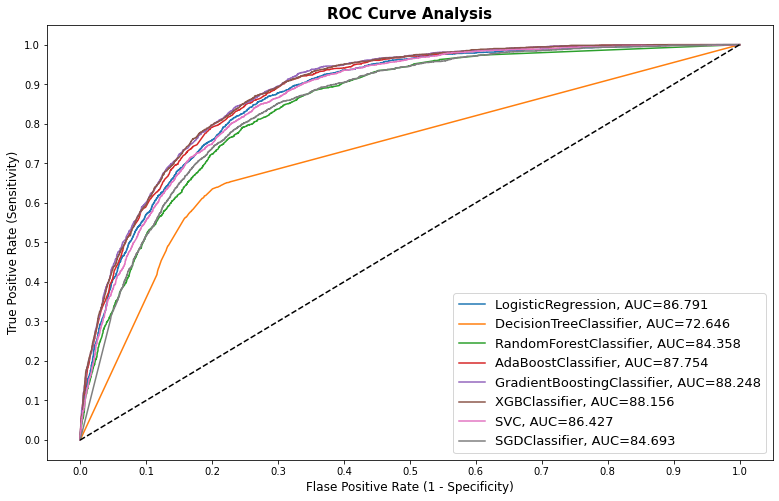

In [92]:
# Plotting the ROC Curves
fig = plt.figure(figsize=(13, 8))

for i in roc_auc_df.index:
    plt.plot(roc_auc_df.loc[i]['fpr'], 
             roc_auc_df.loc[i]['tpr'], 
             label="{}, AUC={:.3f}".format(i, roc_auc_df.loc[i]['auc']))
    
plt.plot([0,1], [0,1], color='black', linestyle='--')

plt.xticks(np.arange(0.0, 1.1, step=0.1))
plt.xlabel("Flase Positive Rate (1 - Specificity)", fontsize=12)

plt.yticks(np.arange(0.0, 1.1, step=0.1))
plt.ylabel("True Positive Rate (Sensitivity)", fontsize=12)

plt.title('ROC Curve Analysis', fontweight='bold', fontsize=15)
plt.legend(prop={'size':13}, loc='lower right');

Now we will use a **Voting Classifier**, where we include the better performing models - **Logistic Regression, Adaboost, Gradient Boosting** and **Stochastic Gradient Descent (SGD)**.

First with **"soft"** voting.

In [101]:
# Creating instances of the classifiers that we will be using in Voting classifier
clf1 = LogisticRegression(solver='liblinear')
clf2 = AdaBoostClassifier()
clf3 = GradientBoostingClassifier()
clf4 = SGDClassifier(loss='log')

# Creating the voting classifier with 'soft' voting
eclf1 = VotingClassifier(estimators=[('lr', clf1), ('abc', clf2), ('gbc', clf3), ('sgd', clf4)], voting='soft')

# Fitting the voting clf and making predictions
eclf1.fit(X_train, y_train)
predictions = eclf1.predict(X_test)

# Cross validation scores
cvm = cross_val_score(eclf1, X, y, scoring='balanced_accuracy')
base_score = cvm.mean()
base_std = cvm.std()
print(f'The average base cross-validation score is {round(base_score, 4)} (+- {round(base_std, 4)})', '\n')

# Computing the confusion matrix
cm = confusion_matrix(y_test, predictions)
TN, FP, TP, FN = cm[0][0], cm[0][1], cm[1][1], cm[1][0]

# Computing different metrics
accuracy = (TP + TN)/(TP + TN + FN + FP)
precision = TP/(TP + FP)
sensitivity = TP/(TP + FN)
specificity = TN/(TN + FP)
f1_score = 2*(sensitivity * precision)/(sensitivity + precision)
balanced_accuracy_score = (sensitivity + specificity)/2

# Calculating the probabilities of predictions
y_pred_proba = model.predict_proba(X_test)
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba[:, 1])

# Calculating the ROC-AUC score and Gini
roc_auc = roc_auc_score(y_test, y_pred_proba[:, 1])*100
gini = (2/100) * roc_auc - 1

print("Accuracy (Ratio of Correct Predictions to Total Predictions) = {:.3f}%".format(accuracy*100))
print('Missclassification (1 - Accuracy) = {:.3f}%'.format((1 - accuracy)*100))
print("Precision (Ratio of True Positives to Total Predicted Positives) = {:.3f}%".format(precision*100)) 
print("Sensitivity/Recall (Ratio of True Positives to Total Actual Positives) = {:.3f}%".format(recall*100)) 
print("Specificity (Ratio of True Negatives to Total Actual Negatives) = {:.3f}%".format(specificity*100))
print('Balanced Accuracy Score (Arithmetic Mean of Recall and Specificity) = {:.3f}%'.format(balanced_accuracy_score*100))
print("F1_score (Harmonic mean of Sensitivity and Precision) = {:.3f}%".format(f1_score*100))
print("ROC-AUC score =", roc_auc)
print("Gini =", round(gini, 3))

The average base cross-validation score is 0.7395 (+- 0.0314) 

Accuracy (Ratio of Correct Predictions to Total Predictions) = 81.347%
Missclassification (1 - Accuracy) = 18.653%
Precision (Ratio of True Positives to Total Predicted Positives) = 64.418%
Sensitivity/Recall (Ratio of True Positives to Total Actual Positives) = 64.881%
Specificity (Ratio of True Negatives to Total Actual Negatives) = 91.181%
Balanced Accuracy Score (Arithmetic Mean of Recall and Specificity) = 70.761%
F1_score (Harmonic mean of Sensitivity and Precision) = 56.516%
ROC-AUC score = 84.6930519780728
Gini = 0.694


Now, with **"hard"** voting.

In [102]:
# Creating instances of the classifiers that we will be using in Voting classifier
clf1 = LogisticRegression(solver='liblinear')
clf2 = AdaBoostClassifier()
clf3 = GradientBoostingClassifier()
clf4 = SGDClassifier(loss='log')

# Creating the voting classifier with 'hard' voting
eclf2 = VotingClassifier(estimators=[('lr', clf1), ('abc', clf2), ('gbc', clf3), ('sgd', clf4)], voting='hard')

# Fitting the voting clf and making predictions
eclf2.fit(X_train, y_train)
predictions = eclf2.predict(X_test)

# Fitting the voting clf and making predictions
eclf2.fit(X_train, y_train)
predictions = eclf2.predict(X_test)

# Cross validation scores
cvm = cross_val_score(eclf2, X, y, scoring='balanced_accuracy')
base_score = cvm.mean()
base_std = cvm.std()
print(f'The average base cross-validation score is {round(base_score, 4)} (+- {round(base_std, 4)})', '\n')

cm = confusion_matrix(y_test, predictions)
TN, FP, TP, FN = cm[0][0], cm[0][1], cm[1][1], cm[1][0]

# Computing different metrics
accuracy = (TP + TN)/(TP + TN + FN + FP)
precision = TP/(TP + FP)
sensitivity = TP/(TP + FN)
specificity = TN/(TN + FP)
f1_score = 2*(sensitivity * precision)/(sensitivity + precision)
balanced_accuracy_score = (sensitivity + specificity)/2

# Calculating the probabilities of predictions
y_pred_proba = model.predict_proba(X_test)
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba[:, 1])

# Calculating the ROC-AUC score and Gini
roc_auc = roc_auc_score(y_test, y_pred_proba[:, 1])*100
gini = (2/100) * roc_auc - 1

print("Accuracy (Ratio of Correct Predictions to Total Predictions) = {:.3f}%".format(accuracy*100))
print('Missclassification (1 - Accuracy) = {:.3f}%'.format((1 - accuracy)*100))
print("Precision (Ratio of True Positives to Total Predicted Positives) = {:.3f}%".format(precision*100)) 
print("Sensitivity/Recall (Ratio of True Positives to Total Actual Positives) = {:.3f}%".format(recall*100)) 
print("Specificity (Ratio of True Negatives to Total Actual Negatives) = {:.3f}%".format(specificity*100))
print('Balanced Accuracy Score (Arithmetic Mean of Recall and Specificity) = {:.3f}%'.format(balanced_accuracy_score*100))
print("F1_score (Harmonic mean of Sensitivity and Precision) = {:.3f}%".format(f1_score*100))
print("ROC-AUC score =", roc_auc)
print("Gini =", round(gini, 3))

The average base cross-validation score is 0.7211 (+- 0.0114) 

Accuracy (Ratio of Correct Predictions to Total Predictions) = 82.903%
Missclassification (1 - Accuracy) = 17.097%
Precision (Ratio of True Positives to Total Predicted Positives) = 69.688%
Sensitivity/Recall (Ratio of True Positives to Total Actual Positives) = 64.881%
Specificity (Ratio of True Negatives to Total Actual Negatives) = 92.921%
Balanced Accuracy Score (Arithmetic Mean of Recall and Specificity) = 72.119%
F1_score (Harmonic mean of Sensitivity and Precision) = 59.109%
ROC-AUC score = 84.6930519780728
Gini = 0.694


With the above comparison between the voting modes of the voting classifer, 'soft' voting is giving a much better result in terms of performance in predictiions.

**Hyperparameter Tuning of the Voting Classifier**

In [103]:
# Creating instances of the classifiers that we will be using in Voting classifier
clf1 = LogisticRegression(solver='liblinear')
clf2 = AdaBoostClassifier()
clf3 = GradientBoostingClassifier()
clf4 = SGDClassifier(loss='log')

# Creating the voting classifier with 'soft' voting
vc = VotingClassifier(estimators=[('lr', clf1), ('abc', clf2), ('gbc', clf3), ('sgd', clf4)])

# Using the GridSearchCV
params = {'voting': ['hard', 'soft'],
          'weights': [(1, 1, 1, 1), (1, 1, 1, 2), (1, 1, 2, 1), (1, 2, 1, 1), (2, 1, 1, 1), (1, 2, 1, 2), (2, 1, 2, 1), (1, 2, 1, 2)]}

grid_vc = GridSearchCV(estimator=vc,
                       param_grid=params,
                       cv=5,
                       n_jobs=4,
                       verbose=1, 
                       scoring='balanced_accuracy')

grid_vc.fit(X, y)
print(grid_vc.best_params_)
print(grid_vc.best_score_)

Fitting 5 folds for each of 16 candidates, totalling 80 fits
{'voting': 'soft', 'weights': (1, 2, 1, 2)}
0.7398511681405502


#### **Final Model** using the voting classifier.

In [106]:
# Creating instances of the classifiers that we will be using in Voting classifier
clf1 = LogisticRegression(solver='liblinear')
clf2 = AdaBoostClassifier()
clf3 = GradientBoostingClassifier()
clf4 = SGDClassifier(loss='log')

# Creating the voting classifier with 'hard' voting
vc_final = VotingClassifier(estimators=[('lr', clf1), ('abc', clf2), ('gbc', clf3), ('sgd', clf4)], voting='soft', weights=(1, 2, 1, 2))

# Fitting the voting clf and making predictions
vc_final.fit(X_train, y_train)
predictions = vc_final.predict(X_test)

# Fitting the voting clf and making predictions
vc_final.fit(X_train, y_train)
predictions = vc_final.predict(X_test)

# Cross validation scores
cvm = cross_val_score(vc_final, X, y, scoring='balanced_accuracy')
base_score = cvm.mean()
base_std = cvm.std()
print(f'The average base cross-validation score is {round(base_score, 4)} (+- {round(base_std, 4)})', '\n')

cm = confusion_matrix(y_test, predictions)
TN, FP, TP, FN = cm[0][0], cm[0][1], cm[1][1], cm[1][0]

# Computing different metrics
accuracy = (TP + TN)/(TP + TN + FN + FP)
precision = TP/(TP + FP)
sensitivity = TP/(TP + FN)
specificity = TN/(TN + FP)
f1_score = 2*(sensitivity * precision)/(sensitivity + precision)
balanced_accuracy_score = (sensitivity + specificity)/2

# Calculating the probabilities of predictions
y_pred_proba = model.predict_proba(X_test)
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba[:, 1])

# Calculating the ROC-AUC score and Gini
roc_auc = roc_auc_score(y_test, y_pred_proba[:, 1])*100
gini = (2/100) * roc_auc - 1

print("Accuracy (Ratio of Correct Predictions to Total Predictions) = {:.3f}%".format(accuracy*100))
print('Missclassification (1 - Accuracy) = {:.3f}%'.format((1 - accuracy)*100))
print("Precision (Ratio of True Positives to Total Predicted Positives) = {:.3f}%".format(precision*100)) 
print("Sensitivity/Recall (Ratio of True Positives to Total Actual Positives) = {:.3f}%".format(recall*100)) 
print("Specificity (Ratio of True Negatives to Total Actual Negatives) = {:.3f}%".format(specificity*100))
print('Balanced Accuracy Score (Arithmetic Mean of Recall and Specificity) = {:.3f}%'.format(balanced_accuracy_score*100))
print("F1_score (Harmonic mean of Sensitivity and Precision) = {:.3f}%".format(f1_score*100))
print("ROC-AUC score =", roc_auc)
print("Gini =", round(gini, 3))

The average base cross-validation score is 0.7359 (+- 0.0164) 

Accuracy (Ratio of Correct Predictions to Total Predictions) = 79.423%
Missclassification (1 - Accuracy) = 20.577%
Precision (Ratio of True Positives to Total Predicted Positives) = 55.773%
Sensitivity/Recall (Ratio of True Positives to Total Actual Positives) = 64.881%
Specificity (Ratio of True Negatives to Total Actual Negatives) = 82.335%
Balanced Accuracy Score (Arithmetic Mean of Recall and Specificity) = 76.287%
F1_score (Harmonic mean of Sensitivity and Precision) = 62.175%
ROC-AUC score = 84.6930519780728
Gini = 0.694


So, our final model can be considered as a better model than all the previous models based on the balanced accuracy and f1 score. The final model also has a good ROC-AUC and a good Gini score. 